# 导包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from pyecharts import options as opts
from pyecharts.charts import Bar, Line
from pyecharts.faker import Faker
from pyecharts.charts import Line
from pyecharts.charts import Graph
from pyecharts.charts import Pie
from pyecharts.charts import *
from sklearn.cluster import KMeans
import joblib
from sklearn import metrics
from scipy.spatial.distance import cdist
import seaborn as sns
from itertools import combinations
# 使数输出时对齐
pd.set_option("display.unIcode.east_asian_width", True)
# 设置中文字体
plt.rcParams["font.family"] = ["SimHei"]
# 解决负号不显示
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 数据清洗

uid:用户id
user_city:用户城市
item_id:作品id
author_id:作者id
item_city:作者城市
channel:作品频道
finish:是否看完 0表示没有看完；1表示看完了
like:是否点赞 0表示没有点赞；1表示点赞了
music_id:音乐id
duration_time:作品时长
real_time:具体发布时间
H、date:时、天(发布)

In [2]:
#读取数据
df=pd.read_csv('./douyin_dataset.csv')
df.head()

Unnamed: 0    uid  user_city  item_id  author_id  item_city  channel  \
0           3  15692      109.0   691661      18212      213.0        0   
1           5  44071       80.0  1243212      34500       68.0        0   
2          16  10902      202.0  3845855     634066      113.0        0   
3          19  25300       21.0  3929579     214923      330.0        0   
4          24   3656      138.0  2572269     182680       80.0        0   

   finish  like  music_id  duration_time            real_time   H        date  
0       0     0   11513.0             10  2019-10-28 21:55:10  21  2019-10-28  
1       0     0    1274.0              9  2019-10-21 22:27:03  22  2019-10-21  
2       0     0     762.0             10  2019-10-26 00:38:51   0  2019-10-26  
3       0     0    2332.0             15  2019-10-25 20:36:25  20  2019-10-25  
4       0     0     238.0              9  2019-10-21 20:46:29  20  2019-10-21

In [3]:
#删除第一列
del df['Unnamed: 0']
df.head()

uid  user_city  item_id  author_id  item_city  channel  finish  like  \
0  15692      109.0   691661      18212      213.0        0       0     0   
1  44071       80.0  1243212      34500       68.0        0       0     0   
2  10902      202.0  3845855     634066      113.0        0       0     0   
3  25300       21.0  3929579     214923      330.0        0       0     0   
4   3656      138.0  2572269     182680       80.0        0       0     0   

   music_id  duration_time            real_time   H        date  
0   11513.0             10  2019-10-28 21:55:10  21  2019-10-28  
1    1274.0              9  2019-10-21 22:27:03  22  2019-10-21  
2     762.0             10  2019-10-26 00:38:51   0  2019-10-26  
3    2332.0             15  2019-10-25 20:36:25  20  2019-10-25  
4     238.0              9  2019-10-21 20:46:29  20  2019-10-21

In [4]:
#查看数据信息
df.info(null_counts=True)

C:\Users\15355\AppData\Local\Temp\ipykernel_14468\2594711675.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737312 entries, 0 to 1737311
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   uid            1737312 non-null  int64  
 1   user_city      1737312 non-null  float64
 2   item_id        1737312 non-null  int64  
 3   author_id      1737312 non-null  int64  
 4   item_city      1737312 non-null  float64
 5   channel        1737312 non-null  int64  
 6   finish         1737312 non-null  int64  
 7   like           1737312 non-null  int64  
 8   music_id       1737312 non-null  float64
 9   duration_time  1737312 non-null  int64  
 10  real_time      1737312 non-null  object 
 11  H              1737312 non-null  int64  
 12  date           1737312 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 172.3+ MB


In [5]:
#查看是否存在空值
df.isna().any()

uid              False
user_city        False
item_id          False
author_id        False
item_city        False
channel          False
finish           False
like             False
music_id         False
duration_time    False
real_time        False
H                False
date             False
dtype: bool

In [6]:
# 数据清洗(包括 空值、重复值、不合理值)

# 空值判断
print(f'数据中含有空值的数据有：{df.isna().any().sum()}条')

# 重复值判断
print(f'数据中共有重复值：{df.duplicated().sum()}条')

数据中含有空值的数据有：0条
数据中共有重复值：0条


In [7]:
#查看播放时长范围
df['duration_time'].unique()

array([ 10,   9,  15,   6,   4,  18,   5,  21,   7,  42,   8,  20,   2,
        16,  11,  13,  19,  17,  14,   3,  12,  25,  29,  30,  39,  41,
        23,  32,  22,  26,  35,  24,  40,  38,  28,  27,  34,  37,  31,
        33,  46,  36,  43,   0,   1, 640, 620, 109, 119,  67,  65,  72,
        99,  49,  57,  48,  62, 555,  52, 102,  86,  61,  51,  55,  50,
       187,  54,  44,  70,  82,  63,  47], dtype=int64)

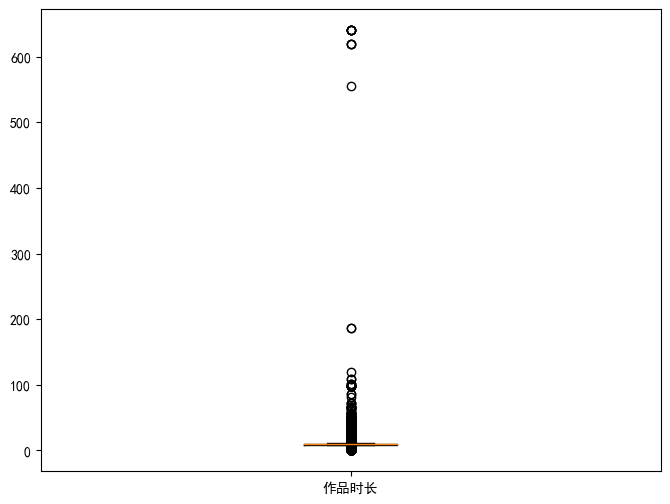

In [9]:
#用箱形图查看播放时长
plt.rcParams['figure.figsize']=(8.0,6.0) #图形大小
fig,ax = plt.subplots()
ax.boxplot(df['duration_time'])
ax.set_xticklabels(['作品时长']) 
plt.show()

In [10]:
#删除150以上的播放时长数据
df=df[(df['duration_time']>=1)&(df['duration_time']<=150)]

In [11]:
#查看删除后的时长范围
df['duration_time'].unique()

array([ 10,   9,  15,   6,   4,  18,   5,  21,   7,  42,   8,  20,   2,
        16,  11,  13,  19,  17,  14,   3,  12,  25,  29,  30,  39,  41,
        23,  32,  22,  26,  35,  24,  40,  38,  28,  27,  34,  37,  31,
        33,  46,  36,  43,   1, 109, 119,  67,  65,  72,  99,  49,  57,
        48,  62,  52, 102,  86,  61,  51,  55,  50,  54,  44,  70,  82,
        63,  47], dtype=int64)

In [12]:
#查看有几种播放频道
df['channel'].unique()

array([0, 3, 4, 2], dtype=int64)

In [13]:
#查看点赞数据
df['like'].unique()

array([0, 1], dtype=int64)

In [13]:
#查看完成信息
df['finish'].unique()

array([0, 1], dtype=int64)

In [14]:
#查看时间信息
df['H'].unique()

array([21, 22,  0, 20,  6, 11,  3,  5, 23,  4,  9,  2, 17, 12, 19, 10, 18,
        8,  1,  7, 16, 15, 13, 14], dtype=int64)

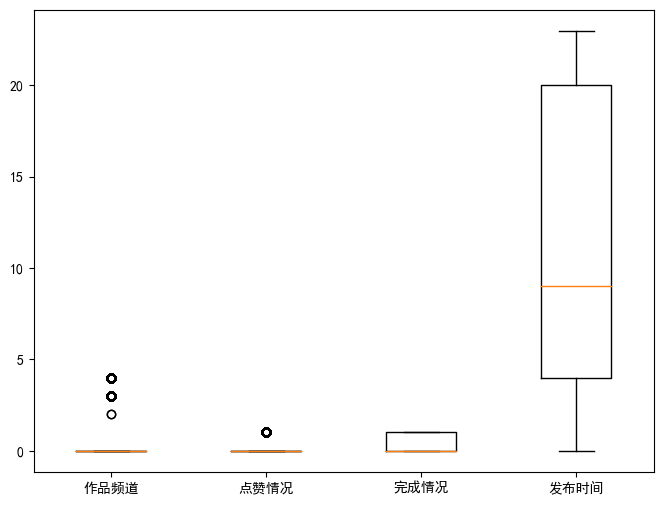

In [17]:
#用箱形图展示数据信息
plt.rcParams['figure.figsize']=(8.0,6.0) #图形大小
fig,ax = plt.subplots()
data = [df['channel'],df['like'],df['finish'],df['H']]
ax.boxplot(data)
ax.set_xticklabels(["作品频道", "点赞情况", "完成情况", "发布时间"])     # 设置x轴刻度标签
plt.show()
#播放频道有四种但是大部分都是第0种所以其他数据超出箱形图范围，但不属于违规值
#点赞情况0代表未点赞，1代表点了赞因为大部分数据都是为点赞所以1超出箱形图范围但1也不算违规值

In [16]:
# 用正则表达式查看时间数据的规范性
real_time_error=[]
date_error=[]
#判断时间格式为：yyyy/MM/dd HH:mm:ss
time=r"\d{4}([\/:\-\s])(1[0-2]|0?[1-9])\1(0?[1-9]|[1-2]\d|30|31) (?:[01]\d|2[0-3]):[0-5]\d:[0-5]\d"
#判断时间格式为：yyyy/MM/dd
time_2=r'\d{4}([\/:\-\s])(1[0-2]|0?[1-9])\1(0?[1-9]|[1-2]\d|30|31)'
for i in df.index[:-1]:
    m = re.match(time,str(df['real_time'][i]))
    if m:
        pass
    else:
        real_time_error.append(i)
    m1 = re.match(time_2,str(df['date'][i]))
    if m1:
        pass
    else:
        date_error.append(i)

In [17]:
#时间信息没有违规值
print(f'real_time字段有违规值{len(real_time_error)}条,data字段有违规值{len(date_error)}条')

real_time字段有违规值0条,data字段有违规值0条


In [18]:
df.head()

uid  user_city  item_id  author_id  item_city  channel  finish  like  \
0  15692      109.0   691661      18212      213.0        0       0     0   
1  44071       80.0  1243212      34500       68.0        0       0     0   
2  10902      202.0  3845855     634066      113.0        0       0     0   
3  25300       21.0  3929579     214923      330.0        0       0     0   
4   3656      138.0  2572269     182680       80.0        0       0     0   

   music_id  duration_time            real_time   H        date  
0   11513.0             10  2019-10-28 21:55:10  21  2019-10-28  
1    1274.0              9  2019-10-21 22:27:03  22  2019-10-21  
2     762.0             10  2019-10-26 00:38:51   0  2019-10-26  
3    2332.0             15  2019-10-25 20:36:25  20  2019-10-25  
4     238.0              9  2019-10-21 20:46:29  20  2019-10-21

In [19]:
# 将时间的数据类型从 object 修改为 datetime 类型
df[['real_time', 'date']] = df[['real_time', 'date']].apply(pd.to_datetime)
# 对于时间，添加 week 列
df['week'] = df['date'].dt.dayofweek
df.head()

uid  user_city  item_id  author_id  item_city  channel  finish  like  \
0  15692      109.0   691661      18212      213.0        0       0     0   
1  44071       80.0  1243212      34500       68.0        0       0     0   
2  10902      202.0  3845855     634066      113.0        0       0     0   
3  25300       21.0  3929579     214923      330.0        0       0     0   
4   3656      138.0  2572269     182680       80.0        0       0     0   

   music_id  duration_time           real_time   H       date  week  
0   11513.0             10 2019-10-28 21:55:10  21 2019-10-28     0  
1    1274.0              9 2019-10-21 22:27:03  22 2019-10-21     0  
2     762.0             10 2019-10-26 00:38:51   0 2019-10-26     5  
3    2332.0             15 2019-10-25 20:36:25  20 2019-10-25     4  
4     238.0              9 2019-10-21 20:46:29  20 2019-10-21     0

In [20]:
# 查看清洗完后的数据信息
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1737282 entries, 0 to 1737311
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   uid            1737282 non-null  int64         
 1   user_city      1737282 non-null  float64       
 2   item_id        1737282 non-null  int64         
 3   author_id      1737282 non-null  int64         
 4   item_city      1737282 non-null  float64       
 5   channel        1737282 non-null  int64         
 6   finish         1737282 non-null  int64         
 7   like           1737282 non-null  int64         
 8   music_id       1737282 non-null  float64       
 9   duration_time  1737282 non-null  int64         
 10  real_time      1737282 non-null  datetime64[ns]
 11  H              1737282 non-null  int64         
 12  date           1737282 non-null  datetime64[ns]
 13  week           1737282 non-null  int64         
dtypes: datetime64[ns](2), float64(3), 

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


# 数据可视化

In [21]:
#取用户城市信息
df_user_city=df['user_city'].value_counts().sort_index()
df_user_city

0.0      1833
1.0      5557
2.0      2495
3.0      8260
5.0      8306
         ... 
384.0       2
385.0      29
386.0       3
387.0       4
393.0       1
Name: user_city, Length: 387, dtype: int64

In [22]:
#取作者城市信息
df_item_city=df['item_city'].value_counts().sort_index()
df_item_city

0.0      21251
1.0      15389
2.0       8099
3.0      13099
4.0      37245
         ...  
446.0        1
448.0        1
458.0        1
459.0        1
460.0        1
Name: item_city, Length: 411, dtype: int64

In [23]:
#用户与作者数量城市分布图
c = (
    Bar()
    .add_xaxis(df_item_city.index.to_list())
    .add_yaxis("用户",df_user_city.values.tolist(),itemstyle_opts=opts.ItemStyleOpts(color='#7B68EE'))
    .add_yaxis("作者",df_item_city.values.tolist(),itemstyle_opts=opts.ItemStyleOpts(color='#3CB371'))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="用户与作者数量城市分布图"),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
    )
)
c.render_notebook()

In [24]:
#取音乐与播放时长信息
df_music=df[['music_id','duration_time','like']]
df_music.head()

music_id  duration_time  like
0   11513.0             10     0
1    1274.0              9     0
2     762.0             10     0
3    2332.0             15     0
4     238.0              9     0

In [25]:
#统计每首背景音乐播放数量以及平均播放时长
music = pd.DataFrame()
music['music_time']=df_music[['music_id','duration_time']].groupby('music_id').sum()
music['music_count']=df_music[['music_id','duration_time']].groupby('music_id').count()
music['music_avgtime']=music['music_time']/music['music_count']
music['like']=df_music[['music_id','like']].groupby('music_id')['like'].apply(lambda x: (x==1).sum())
music.head()

music_time  music_count  music_avgtime  like
music_id                                              
1.0             8338          770      10.828571     4
2.0              438           25      17.520000     0
3.0              135           12      11.250000     0
4.0             7598          749      10.144192     8
5.0             6250          701       8.915835     4

In [26]:
music.sort_values(by='music_count',ascending=False)

music_time  music_count  music_avgtime  like
music_id                                              
22.0          604414        51627      11.707324   382
220.0         448862        41412      10.838936   278
25.0          311859        27837      11.203039   276
68.0          248283        22359      11.104387   167
110.0         235844        21087      11.184332   142
...              ...          ...            ...   ...
44314.0            9            1       9.000000     1
44321.0            9            1       9.000000     0
44322.0           10            1      10.000000     0
44323.0           10            1      10.000000     0
89776.0            2            1       2.000000     0

[40760 rows x 4 columns]

In [27]:
#音乐播放量Top20
x_data=list(map(str, music.sort_values(by='music_count',ascending=False).iloc[:20].sort_index().index.tolist()))
bar = (
    Bar()
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        z=0,
        series_name="播放量",
        y_axis=music.sort_values(by='music_count',ascending=False)['music_count'].tolist()[:20],
        label_opts=opts.LabelOpts(is_show=False),
        itemstyle_opts=opts.ItemStyleOpts(color='#6495ED')
    )
    .add_yaxis(
        z=0,
        series_name="点赞量",
        y_axis=music.sort_values(by='music_count',ascending=False)['like'].tolist()[:20],
        label_opts=opts.LabelOpts(is_show=False),
        itemstyle_opts=opts.ItemStyleOpts(color='#9370DB')
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="时间",
            type_="value",
            min_=5,
            max_=20,
            interval=5,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
        )
    )
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
        ),
        title_opts=opts.TitleOpts(title="音乐播放量Top20"),
        
    )
)

line = (
    Line()
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="平均播放时间",
        yaxis_index=1,
        y_axis=music.sort_values(by='music_count',ascending=False)['music_avgtime'].tolist()[:20],
        label_opts=opts.LabelOpts(is_show=False),
        itemstyle_opts=opts.ItemStyleOpts(color='#FF6347')
    )
    
)

bar.overlap(line).render_notebook()

In [28]:
#取不同时间用户点赞信息
df_H_like=df[['H','like']].groupby('H')['like'].apply(lambda x: (x==1).sum())
df_H_like

H
0     1043
1      935
2      933
3      904
4     1037
5     1035
6      878
7      816
8      627
9      400
10     284
11     238
12     134
13      96
14      72
15     128
16     268
17     542
18     901
19    1115
20    1031
21    1096
22    1117
23    1143
Name: like, dtype: int64

In [29]:
df_H_nolike=df[['H','like']].groupby('H')['like'].apply(lambda x: (x==0).sum())
df_H_nolike

H
0     110540
1      98127
2      92842
3      94310
4     105671
5     105725
6      94320
7      82740
8      61114
9      41987
10     29317
11     24769
12     15073
13      9246
14      8634
15     11493
16     27306
17     57535
18     87956
19    110879
20    108780
21    106747
22    114515
23    120883
Name: like, dtype: int64

In [30]:
#不同发布时间作品用户点赞情况
c=(
    Line()
    .add_xaxis(xaxis_data=df_H_like.index.to_list())
    .add_yaxis(
        series_name="用户点赞量",
        stack="总量",
        y_axis=df_H_like.values.tolist(),
        areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
        itemstyle_opts=opts.ItemStyleOpts(color='#8B0000')
    )
    .add_yaxis(
        series_name="用户未点赞量",
        stack="总量",
        y_axis=df_H_nolike.values.tolist(),
        areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
        itemstyle_opts=opts.ItemStyleOpts(color='#191970')
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="不同发布时间作品用户点赞情况"),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    )
)
c.render_notebook()

In [31]:
#统计40天内用户点赞情况
df['date'].unique() # 2019-09-21 --- 2019-10-30

df.groupby('date')['like'].apply(lambda x: (x==1).sum())

date
2019-09-21       0
2019-09-22       9
2019-09-23      17
2019-09-24      34
2019-09-25      38
2019-09-26      58
2019-09-27      60
2019-09-28      73
2019-09-29     108
2019-09-30     121
2019-10-01     127
2019-10-02      94
2019-10-03     151
2019-10-04     149
2019-10-05     160
2019-10-06     172
2019-10-07     171
2019-10-08     234
2019-10-09     203
2019-10-10     227
2019-10-11     182
2019-10-12     234
2019-10-13     276
2019-10-14     294
2019-10-15     317
2019-10-16     309
2019-10-17     363
2019-10-18     372
2019-10-19     495
2019-10-20     590
2019-10-21    1067
2019-10-22    1286
2019-10-23    1451
2019-10-24    1356
2019-10-25    1189
2019-10-26    1211
2019-10-27    1163
2019-10-28    1079
2019-10-29    1003
2019-10-30     330
Name: like, dtype: int64

In [32]:
# # 40天点赞
l = (
    Line()
    .add_xaxis(df.groupby('date')['like'].sum().index.tolist())
    .add_yaxis("点赞", df.groupby('date')['like'].sum().tolist(), is_smooth=True,itemstyle_opts=opts.ItemStyleOpts(color='#8B0000'))
    .add_yaxis("未点赞", df.groupby('date')['like'].apply(lambda x: (x==0).sum()).tolist(), is_smooth=True,itemstyle_opts=opts.ItemStyleOpts(color='#000080'))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="40天点赞"),
        datazoom_opts=[opts.DataZoomOpts(),opts.DataZoomOpts(type_="inside")],
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
        
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
)
l.render_notebook()

In [33]:
#40天完播情况
l = (
    Line()
    .add_xaxis(df.groupby('date')['finish'].sum().index.tolist())
    .add_yaxis("完播", df.groupby('date')['finish'].sum().tolist(), is_smooth=True)
    .add_yaxis("未完播", df.groupby('date')['finish'].apply(lambda x: (x==0).sum()).tolist(), is_smooth=True)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="40天看完"),
        datazoom_opts=[opts.DataZoomOpts(),opts.DataZoomOpts(type_="inside")],
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    
)
l.render_notebook()

In [34]:
#取用户城市与作者城市id
df_city=df[['user_city','item_city']]
df_city.head()

user_city  item_city
0      109.0      213.0
1       80.0       68.0
2      202.0      113.0
3       21.0      330.0
4      138.0       80.0

In [35]:
#创建作者id与用户id关系数据
def nodes(dataframe):
    nodes=[]
    link=[]
    df_node=dataframe.iloc[:,1].value_counts().sort_index()
    for i in df_node.index[:50]:
        dic_node={
            "name": i,
            "symbolSize": df_node.loc[i],
            "draggable": "False",
            "value":df_node.loc[i]
              }
        nodes.append(dic_node)
    for a in df_node.index[:50]:
        for b in dataframe[dataframe.iloc[:,1]==a].iloc[:,0].value_counts().index.to_list():
            dic_link={
                "source": a,
                "target": b,
                "value":df_node.loc[a]
            }
            link.append(dic_link)
    return nodes,link

In [36]:
nodes,links=nodes(df_city)

In [37]:
#作者所在城市与其用户分布关系图
c = (
    Graph()
    .add(
        "",
        nodes,
        links,
        repulsion=50,
        linestyle_opts=opts.LineStyleOpts(curve=0.2),
        label_opts=opts.LabelOpts(is_show=False),
        itemstyle_opts=opts.ItemStyleOpts(color='#B22222')
    )
    .set_global_opts(
        legend_opts=opts.LegendOpts(is_show=False),
        title_opts=opts.TitleOpts(title="作者地区与用户地区分布关系"),
    )
)
c.render_notebook()

In [38]:
# 抖音播放量来源渠道分布扇形图
data_channel = df.groupby('channel', as_index=False)['uid'].count().rename(columns={'uid': 'count'}).sort_values(by='count', ascending=False)

data_pair = list(zip(list(map(str,data_channel['channel'])), data_channel['count']))

pie = Pie()

pie.add(
    '',
    data_pair,
    radius=['30%', '45%'],
    label_opts=opts.LabelOpts(formatter='{b}: {d}%')
)

pie.set_global_opts(
    title_opts=opts.TitleOpts(title='抖音播放量来源渠道分布扇形图', pos_left='center'),
    legend_opts=opts.LegendOpts(is_show=True, pos_left='center', pos_top='10%')
)
pie.set_colors(['#00FF7F','#00BFFF','#FFB6C1','#F0E68C'])
pie.render_notebook()

In [39]:
# 星期 对浏览人数的影响 和 每周内点赞数占比
week_data = df.groupby(['week']).agg({'uid': 'count', 'like': 'sum'})
week = week_data['uid'].tolist()
week_like = week_data['like'].tolist()
week_like_sum = df['like'].sum()
df_pair_inner = [
    ['周一', round(week_like[0]/week_like_sum, 4)*100], 
    ['周二', round(week_like[1]/week_like_sum, 4)*100], 
    ['周三', round(week_like[2]/week_like_sum, 4)*100], 
    ['周四', round(week_like[3]/week_like_sum, 4)*100], 
    ['周五', round(week_like[4]/week_like_sum, 4)*100], 
    ['周六', round(week_like[5]/week_like_sum, 4)*100], 
    ['周日', round(week_like[6]/week_like_sum, 4)*100]
]
df_pair_outer = [
    ['周一', week[0]], 
    ['周二', week[1]], 
    ['周三', week[2]], 
    ['周四', week[3]], 
    ['周五', week[4]], 
    ['周六', week[5]], 
    ['周日', week[6]]
]
c = (
    Pie()
    .add(
        series_name="点赞占比",
        data_pair=df_pair_inner,
        radius=[0, "30%"],
        label_opts=opts.LabelOpts(position="inner"),
    )
    .add(
        "",
        df_pair_outer,
        radius=['40%', '70%'],
        rosetype='radius',
        # center=['45%', '50%'],
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{a|播放量}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
            background_color="#eee",
            border_color="#aaa",
            border_width=1,
            border_radius=4,
            rich={
                "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                "per": {
                    "color": "#eee",
                    "backgroundColor": "#334455",
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        ),
    )
    .set_global_opts(
        legend_opts=opts.LegendOpts(pos_right='10%',pos_top='2%',orient='vertical'),
        title_opts=opts.TitleOpts(title="一周内播放分布图",pos_left='35%'),
    )
    .set_colors(['#00FF7F','#00BFFF','#FFB6C1','#F0E68C','#EE82EE','#F4A460','#FF6347'])
    # .render("pie_rich_label.html")
)
c.render_notebook()

In [40]:
#用户特征构建
user_df = pd.DataFrame()
user_df['uid'] = df.groupby('uid')['like'].count().index.tolist() # 将所有用户的uid提取为uid列
user_df.set_index('uid', inplace=True) # 设置uid列为index，方便后续数据自动对齐
user_df['浏览量'] = df.groupby('uid')['like'].count() # 统计对应uid下的浏览量
user_df['点赞量']  = df.groupby('uid')['like'].sum() # 统计对应uid下的点赞量
user_df['观看作者数'] = df.groupby(['uid']).agg({'author_id':pd.Series.nunique}) # 观看作者数
user_df['观看作品数'] = df.groupby(['uid']).agg({'item_id':pd.Series.nunique}) # 观看作品数
user_df['观看作品平均时长'] = df.groupby(['uid'])['duration_time'].mean() # 浏览作品平均时长
user_df['观看配乐数'] = df.groupby(['uid']).agg({'music_id':pd.Series.nunique}) # 观看作品中配乐的数量
user_df['完整观看数']  = df.groupby('uid')['finish'].sum() # 统计对应uid下的完整观看数
# 统计对应uid用户去过的城市数量
user_df['去过的城市数'] = df.groupby(['uid']).agg({'user_city':pd.Series.nunique})
# 统计对应uid用户看的作品所在的城市数量
user_df['观看作品城市数'] = df.groupby(['uid']).agg({'item_city':pd.Series.nunique})
user_df.describe()

浏览量        点赞量    观看作者数    观看作品数  \
count  59232.000000  59232.000000  59232.000000  59232.000000   
mean      29.330126      0.283175     28.337520     29.329805   
std       49.588035      2.240180     46.641613     49.587472   
min        1.000000      0.000000      1.000000      1.000000   
25%        4.000000      0.000000      4.000000      4.000000   
50%       12.000000      0.000000     12.000000     12.000000   
75%       34.000000      0.000000     33.000000     34.000000   
max     1951.000000    183.000000   1740.000000   1951.000000   

       观看作品平均时长    观看配乐数    完整观看数  去过的城市数  \
count      59232.000000  59232.000000  59232.000000  59232.000000   
mean          11.330893     25.611004     11.759826      1.155372   
std            3.300132     38.458267     16.970476      0.529922   
min            2.000000      1.000000      0.000000      1.000000   
25%            9.705882      4.000000      2.000000      1.000000   
50%           10.833333     12.000000      6.000000      1.000000   
75%           12.086957     31.000000     15.000000      1.000000   
max           42.000000   1197.000000    284.000000     10.000000   

       观看作品城市数  
count    59232.000000  
mean        20.322444  
std         24.594874  
min          1.000000  
25%          4.000000  
50%         11.000000  
75%         28.000000  
max        279.000000

In [41]:
user_df.head()

浏览量  点赞量  观看作者数  观看作品数  观看作品平均时长  观看配乐数  \
uid                                                                         
0        34       0          31          34         12.058824          31   
1        28       1          28          28         12.357143          26   
2        56       0          56          56         10.357143          47   
3       117       1         116         117          9.982906          89   
4       123       0         117         123         10.853659          94   

     完整观看数  去过的城市数  观看作品城市数  
uid                                            
0            18             1              28  
1            14             1              25  
2            19             3              45  
3            60             1              76  
4            77             1              84

In [42]:
#用户点赞量与浏览量对比图
l = (
    Line()
    .add_xaxis(user_df[user_df['点赞量']>0]['浏览量'].index.tolist())
    .add_yaxis("浏览量", user_df[user_df['点赞量']>0]['浏览量'].tolist(), is_smooth=True, color='green')
    .add_yaxis("点赞量", user_df[user_df['点赞量']>0]['点赞量'].tolist(), is_smooth=True, color='red')
    .set_global_opts(
        title_opts=opts.TitleOpts(title="用户点赞量浏览量对比"),
        datazoom_opts=[opts.DataZoomOpts(),opts.DataZoomOpts(type_="inside")],
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
    )
    
)
l.render_notebook()

In [43]:
user_l_df=pd.cut(user_df['浏览量'],bins=[0,5,10,25,50,100,1000,2000],right=False,labels=['0-5', '5-10', '10-25', '25-50', '50-100', '100-1000', '1000以上'])
user_l_df.value_counts()

0-5         16553
10-25       13778
5-10         9571
25-50        9351
50-100       6231
100-1000     3746
1000以上        2
Name: 浏览量, dtype: int64

In [44]:
#不同浏览量用户占比图
x_data=['10-25', '0-5', '25-50', '5-10', '50-100', '100-1000','1000以上']
c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(x_data, user_l_df.value_counts().values.tolist())],
        rosetype="area",
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="不同浏览量用户占比"))
    .set_colors(['#00FF7F','#00BFFF','#FFB6C1','#F0E68C','#EE82EE','#F4A460','#FF6347'])
)
c.render_notebook()

In [45]:
user_wz_df=pd.cut(user_df['完整观看数'],bins=[0,5,10,20,30,50,300],right=False,labels=['0-5', '5-10', '10-20', '20-30', '30-50','50以上'])
user_wz_df.value_counts()

0-5       26619
5-10      11023
10-20     10531
20-30      4823
30-50      3993
50以上     2243
Name: 完整观看数, dtype: int64

In [46]:
#用户完整观看情况图
from pyecharts.charts import Funnel
x_data=['0-5', '5-10', '10-20', '20-30', '30-50', '50以上']
c = (
    Funnel()
    .add(
        "完整观看数量",
        [list(z) for z in zip(x_data, user_wz_df.value_counts().values.tolist())],
        sort_="ascending",
        label_opts=opts.LabelOpts(position="inside"),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="用户完整观看情况"))
    .set_colors(['#3CB371','#1E90FF','#FFB6C1','#F0E68C','#66CDAA','#EE82EE'])
)
c.render_notebook()

In [47]:
user_like_df=pd.cut(user_df['点赞量'],bins=[-1,0,10,200],labels=['-1,0','0-100','100以上'])
user_like_df.value_counts().index

CategoricalIndex(['-1,0', '0-100', '100以上'], categories=['-1,0', '0-100', '100以上'], ordered=True, dtype='category')

In [48]:
#不同点赞量用户占比图
x_data=['-1,0', '0-100', '100以上']
c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip( x_data,user_like_df.value_counts().values.tolist())],
        radius=["40%", "55%"],
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
            background_color="#eee",
            border_color="#aaa",
            border_width=1,
            border_radius=4,
            rich={
                "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                "per": {
                    "color": "#eee",
                    "backgroundColor": "#334455",
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        ),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="不同点赞量用户占比"))
     .set_colors(['#00FF7F','#00BFFF','#FFB6C1'])
)
c.render_notebook()

In [49]:
#作者特征构建
author_df = pd.DataFrame()
author_df['author_id'] = df.groupby('author_id')['like'].count().index.tolist()
author_df.set_index('author_id', inplace=True)
author_df['总浏览量'] = df.groupby('author_id')['like'].count()
author_df['总点赞量']  = df.groupby('author_id')['like'].sum()
author_df['总观完量']  = df.groupby('author_id')['finish'].sum()
author_df['总作品数'] = df.groupby('author_id').agg({'item_id':pd.Series.nunique})

item_time = df.groupby(['author_id', 'item_id']).mean().reset_index()
author_df['作品平均时长'] = item_time.groupby('author_id')['duration_time'].mean()

author_df['使用配乐数量'] = df.groupby('author_id').agg({'music_id':pd.Series.nunique})
author_df['发布作品日数'] = df.groupby('author_id').agg({'real_time':pd.Series.nunique})

# pd.to_datetime(df['date'].max()) - pd.to_datetime(df['date'].min()) # 作品时间跨度为40，共计40天
author_days = df.groupby('author_id')['date']
_ = pd.to_datetime(author_days.max()) - pd.to_datetime(author_days.min())
author_df['创作活跃度(日)'] = _.astype('timedelta64[D]').astype(int) + 1
author_df['去过的城市数'] = df.groupby(['author_id']).agg({'item_city':pd.Series.nunique})
author_df.describe()

总浏览量       总点赞量       总观完量       总作品数  \
count  208183.000000  208183.000000  208183.000000  208183.000000   
mean        8.344975       0.080569       3.345893       2.158971   
std        38.482028       0.536456      16.886250       3.504402   
min         1.000000       0.000000       0.000000       1.000000   
25%         1.000000       0.000000       0.000000       1.000000   
50%         1.000000       0.000000       0.000000       1.000000   
75%         4.000000       0.000000       2.000000       2.000000   
max      2648.000000      36.000000    1111.000000     152.000000   

        作品平均时长   使用配乐数量   发布作品日数  创作活跃度(日)  \
count  208183.000000  208183.000000  208183.000000   208183.000000   
mean       10.647163       1.942454       2.158889        5.176297   
std         5.470042       2.694681       3.504087        8.432720   
min         1.000000       1.000000       1.000000        1.000000   
25%         9.000000       1.000000       1.000000        1.000000   
50%         9.750000       1.000000       1.000000        1.000000   
75%        10.000000       2.000000       2.000000        4.000000   
max       119.000000      98.000000     152.000000       40.000000   

        去过的城市数  
count  208183.000000  
mean        1.044788  
std         0.285563  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max        19.000000

In [50]:
author_df.head()

总浏览量  总点赞量  总观完量  总作品数  作品平均时长  使用配乐数量  \
author_id                                                                       
0                 1         0         0         1     10.000000             1   
1                16         0         8         3      8.333333             3   
3               311         3       203         1      9.000000             1   
5              1054        33       485         5      8.200000             4   
8                 4         0         3         1     19.000000             1   

           发布作品日数  创作活跃度(日)  去过的城市数  
author_id                                              
0                     1               1             1  
1                     3               9             1  
3                     1               1             1  
5                     5              28             1  
8                     1               1             1

In [51]:
# 抖音播放量Top10作者城市分布
data_author_city = df.groupby('item_city', as_index=False)['item_id'].count().rename(columns={'item_id': 'count'}).sort_values(by='count', ascending=False)

data_author_city_top10 = data_author_city.head(10)

bar = Bar()

bar.add_xaxis(data_author_city_top10['item_city'].tolist())
bar.add_yaxis('', data_author_city_top10['count'].tolist(),itemstyle_opts=opts.ItemStyleOpts(color='#6495ED'))

bar.set_global_opts(
    title_opts=opts.TitleOpts(title='抖音播放量Top10作者城市分布', pos_left='center'),
)

bar.render_notebook()

In [52]:
#作品特征构建
item_df = pd.DataFrame()
item_df['item_id'] = df.groupby('item_id')['like'].count().index.tolist()
item_df.set_index('item_id', inplace=True)
item_df['浏览量'] = df.groupby('item_id')['like'].count()
item_df['点赞量']  = df.groupby('item_id')['like'].sum()
item_df['发布城市'] = df.groupby('item_id')['item_city'].mean()
item_df['背景音乐'] = df.groupby('item_id')['music_id'].mean()
item_df.head()

浏览量  点赞量  发布城市  背景音乐
item_id                                    
0            24       0      24.0     220.0
1          1309       5      63.0     574.0
3             2       0       7.0   26289.0
4           613       3     146.0     162.0
7             2       0      33.0     540.0

In [53]:
# 选择点赞总数大于10的作者
item_like = item_df[item_df['点赞量']>5]
item_like

浏览量  点赞量  发布城市  背景音乐
item_id                                    
100        1287      15     137.0     416.0
128         641      15      29.0     294.0
269         153       8     169.0    2768.0
624         379       9      21.0    1085.0
739        1177      16     132.0     592.0
...         ...     ...       ...       ...
2943744     196       8     102.0     419.0
3237345     147       7     121.0   31440.0
3525422     194       6     297.0     335.0
3526002     126      12      36.0     740.0
3535176      88       7     178.0     501.0

[150 rows x 4 columns]

In [54]:
# 分组统计点赞数
bins = [-1, 10, 20, 30, 40]
group_names = ['6-10', '11-20', '21-30', '31-40']
categories = pd.cut(item_like['点赞量'], bins, labels=group_names)
counts = pd.value_counts(categories)

# 绘制饼图
pie = (
    Pie()
    .add("", [list(z) for z in zip(counts.index.tolist(), counts.values.tolist())])
    .set_series_opts(tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"))
    .set_global_opts(title_opts=opts.TitleOpts(title="作品点赞量分布"))
     .set_colors(['#3CB371','#4169E1','#FFB6C1','#F0E68C'])
)

# 显示图形
pie.render_notebook()

In [55]:
# 作品背景音乐浏览量，点赞量>0总和
item_visits_like = item_df[item_df['点赞量'] > 0].groupby('背景音乐')[['浏览量', '点赞量']].sum()
item_visits_like

浏览量  点赞量
背景音乐                
1.0           34       4
4.0           28       8
5.0          131       4
6.0           11       3
7.0         2698     107
...          ...     ...
87149.0        1       1
87395.0        1       1
87902.0        1       1
88429.0        1       1
88792.0        1       1

[4942 rows x 2 columns]

In [56]:
#背景音乐点赞量与浏览量对比图
l = (
    Line()
    .add_xaxis(item_visits_like.index.tolist())
    .add_yaxis("浏览量", item_visits_like['浏览量'].tolist(), is_smooth=True, color='green')
    .add_yaxis("点赞量", item_visits_like['点赞量'].tolist(), is_smooth=True, color='red')
    .set_global_opts(
        title_opts=opts.TitleOpts(title="背景音乐点赞量浏览量对比"),
        datazoom_opts=[opts.DataZoomOpts(),opts.DataZoomOpts(type_="inside")],
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
    )
    
)
l.render_notebook()

In [57]:
# 作品时长对 finish 与 like 的影响

data_duration_time_finish_like = df.groupby('duration_time', as_index=False).agg({'uid': 'count', 'finish': 'mean', 'like': 'mean'}).sort_values(by='duration_time', ascending=True)

# 折线图，需要将横坐标数据类型转化为字符串str

data_duration_time_finish_like['duration_time'] = data_duration_time_finish_like['duration_time'].astype('str')
line = Line()
line.add_xaxis(data_duration_time_finish_like['duration_time'].tolist())
line.add_yaxis('播放量', data_duration_time_finish_like['uid'].tolist(), yaxis_index=0)
line.add_yaxis('完播率', data_duration_time_finish_like['finish'].tolist(), yaxis_index=1)
line.add_yaxis('点赞率', data_duration_time_finish_like['like'].tolist(), yaxis_index=1)
line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
line.extend_axis(yaxis=opts.AxisOpts())
line.set_global_opts(
        title_opts=opts.TitleOpts(title="背景音乐点赞量浏览量对比"),
        datazoom_opts=[opts.DataZoomOpts(),opts.DataZoomOpts(type_="inside")],
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
    )
line.render_notebook()

In [58]:
df_0_1=item_df.loc[(item_df['浏览量']>=0) & (item_df['浏览量']<=1)]
df_1_2=item_df.loc[(item_df['浏览量']>1) & (item_df['浏览量']<=2)]
df_2_3=item_df.loc[(item_df['浏览量']>2) & (item_df['浏览量']<=3)]
df_3_4=item_df.loc[(item_df['浏览量']>3) & (item_df['浏览量']<=4)]
df_4_100=item_df.loc[(item_df['浏览量']>4) & (item_df['浏览量']<=100)]
df_100_1000=item_df.loc[(item_df['浏览量']>100) & (item_df['浏览量']<=1000)]
df_1000=item_df.loc[(item_df['浏览量']>1000)]

In [59]:
df_like_0_1=pd.cut(df_0_1['点赞量'],bins=[-1,0,1,3,5,10,20,40],right=True,labels=['-1,0','0-1','1-3','3-5','5-10','10-20','20以上'])
df_like_1_2=pd.cut(df_1_2['点赞量'],bins=[-1,0,1,3,5,10,20,40],right=True,labels=['-1,0','0-1','1-3','3-5','5-10','10-20','20以上'])
df_like_2_3=pd.cut(df_2_3['点赞量'],bins=[-1,0,1,3,5,10,20,40],right=True,labels=['-1,0','0-1','1-3','3-5','5-10','10-20','20以上'])
df_like_3_4=pd.cut(df_3_4['点赞量'],bins=[-1,0,1,3,5,10,20,40],right=True,labels=['-1,0','0-1','1-3','3-5','5-10','10-20','20以上'])
df_like_4_100=pd.cut(df_4_100['点赞量'],bins=[-1,0,1,3,5,10,20,40],right=True,labels=['-1,0','0-1','1-3','3-5','5-10','10-20','20以上'])
df_like_100_1000=pd.cut(df_100_1000['点赞量'],bins=[-1,0,1,3,5,10,20,40],right=True,labels=['-1,0','0-1','1-3','3-5','5-10','10-20','20以上'])
df_like_1000=pd.cut(df_1000['点赞量'],bins=[-1,0,1,3,5,10,20,40],right=True,labels=['-1,0','0-1','1-3','3-5','5-10','10-20','20以上'])

In [60]:
value=[]
for i in range(len(df_like_0_1.value_counts().sort_index().tolist())):
    like_0_1=[0,i,df_like_0_1.value_counts().sort_index().tolist()[i]]
    value.append(like_0_1)
for i in range(len(df_like_1_2.value_counts().sort_index().tolist())):
    like_1_2=[1,i,df_like_1_2.value_counts().sort_index().tolist()[i]]
    value.append(like_1_2)
for i in range(len(df_like_2_3.value_counts().sort_index().tolist())):
    like_2_3=[2,i,df_like_2_3.value_counts().sort_index().tolist()[i]]
    value.append(like_2_3)
for i in range(len(df_like_3_4.value_counts().sort_index().tolist())):
    like_3_4=[3,i,df_like_3_4.value_counts().sort_index().tolist()[i]]
    value.append(like_3_4)
for i in range(len(df_like_4_100.value_counts().sort_index().tolist())):
    like_4_100=[4,i,df_like_4_100.value_counts().sort_index().tolist()[i]]
    value.append(like_4_100)
for i in range(len(df_like_100_1000.value_counts().sort_index().tolist())):
    like_100_1000=[5,i,df_like_100_1000.value_counts().sort_index().tolist()[i]]
    value.append(like_100_1000)
for i in range(len(df_like_1000.value_counts().sort_index().tolist())):
    like_1000=[6,i,df_like_1000.value_counts().sort_index().tolist()[i]]
    value.append(like_1000)
value

[[0, 0, 281260],
 [0, 1, 3495],
 [0, 2, 0],
 [0, 3, 0],
 [0, 4, 0],
 [0, 5, 0],
 [0, 6, 0],
 [1, 0, 57774],
 [1, 1, 1175],
 [1, 2, 18],
 [1, 3, 0],
 [1, 4, 0],
 [1, 5, 0],
 [1, 6, 0],
 [2, 0, 27133],
 [2, 1, 734],
 [2, 2, 22],
 [2, 3, 0],
 [2, 4, 0],
 [2, 5, 0],
 [2, 6, 0],
 [3, 0, 16724],
 [3, 1, 634],
 [3, 2, 32],
 [3, 3, 0],
 [3, 4, 0],
 [3, 5, 0],
 [3, 6, 0],
 [4, 0, 52742],
 [4, 1, 4989],
 [4, 2, 892],
 [4, 3, 112],
 [4, 4, 20],
 [4, 5, 1],
 [4, 6, 0],
 [5, 0, 670],
 [5, 1, 421],
 [5, 2, 364],
 [5, 3, 111],
 [5, 4, 90],
 [5, 5, 30],
 [5, 6, 2],
 [6, 0, 0],
 [6, 1, 1],
 [6, 2, 2],
 [6, 3, 4],
 [6, 4, 3],
 [6, 5, 3],
 [6, 6, 1]]

In [61]:
#不同浏览量与点赞量热力分布图
from pyecharts.charts import HeatMap
x_data=['0-1浏览量','1-2浏览量','2-3浏览量','3-4浏览量','4-100浏览量','100-1000','1000以上浏览量']
y_data=['-1-0点赞量','0-1点赞量','1-3点赞量','3-5点赞量','5-10点赞量','10-20点赞量','20以上点赞量']
c = (
    HeatMap()
    .add_xaxis(x_data)
    .add_yaxis(
        "人数", y_data, value, label_opts=opts.LabelOpts(position="middle")
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="浏览量与点赞量热力分布图"),
        visualmap_opts=opts.VisualMapOpts(
            min_=0, max_=5000, is_calculable=True, orient="horizontal", pos_left="center"
        ),
    )
)
c.render_notebook()

# 聚类

In [62]:
from pyecharts.charts import *
from pyecharts import options as opts

from sklearn.cluster import KMeans
import joblib
from sklearn import metrics
from scipy.spatial.distance import cdist

In [63]:
user_df.head()

浏览量  点赞量  观看作者数  观看作品数  观看作品平均时长  观看配乐数  \
uid                                                                         
0        34       0          31          34         12.058824          31   
1        28       1          28          28         12.357143          26   
2        56       0          56          56         10.357143          47   
3       117       1         116         117          9.982906          89   
4       123       0         117         123         10.853659          94   

     完整观看数  去过的城市数  观看作品城市数  
uid                                            
0            18             1              28  
1            14             1              25  
2            19             3              45  
3            60             1              76  
4            77             1              84

In [64]:
user_feature=user_df.iloc[:,0:]
user_feature.head()

浏览量  点赞量  观看作者数  观看作品数  观看作品平均时长  观看配乐数  \
uid                                                                         
0        34       0          31          34         12.058824          31   
1        28       1          28          28         12.357143          26   
2        56       0          56          56         10.357143          47   
3       117       1         116         117          9.982906          89   
4       123       0         117         123         10.853659          94   

     完整观看数  去过的城市数  观看作品城市数  
uid                                            
0            18             1              28  
1            14             1              25  
2            19             3              45  
3            60             1              76  
4            77             1              84

In [65]:
#取完整观看数大于1且浏览量大于5的用户数据
user_data = user_feature[(user_feature['完整观看数']>=1)&(user_feature['浏览量']>=5)]
print(len(user_data)/len(user_feature))

0.7097514856834144


In [66]:
user_data.head()

浏览量  点赞量  观看作者数  观看作品数  观看作品平均时长  观看配乐数  \
uid                                                                         
0        34       0          31          34         12.058824          31   
1        28       1          28          28         12.357143          26   
2        56       0          56          56         10.357143          47   
3       117       1         116         117          9.982906          89   
4       123       0         117         123         10.853659          94   

     完整观看数  去过的城市数  观看作品城市数  
uid                                            
0            18             1              28  
1            14             1              25  
2            19             3              45  
3            60             1              76  
4            77             1              84

In [67]:
author_df.head()

总浏览量  总点赞量  总观完量  总作品数  作品平均时长  使用配乐数量  \
author_id                                                                       
0                 1         0         0         1     10.000000             1   
1                16         0         8         3      8.333333             3   
3               311         3       203         1      9.000000             1   
5              1054        33       485         5      8.200000             4   
8                 4         0         3         1     19.000000             1   

           发布作品日数  创作活跃度(日)  去过的城市数  
author_id                                              
0                     1               1             1  
1                     3               9             1  
3                     1               1             1  
5                     5              28             1  
8                     1               1             1

In [68]:
author_feature=author_df.iloc[:,0:]
author_feature.head()

总浏览量  总点赞量  总观完量  总作品数  作品平均时长  使用配乐数量  \
author_id                                                                       
0                 1         0         0         1     10.000000             1   
1                16         0         8         3      8.333333             3   
3               311         3       203         1      9.000000             1   
5              1054        33       485         5      8.200000             4   
8                 4         0         3         1     19.000000             1   

           发布作品日数  创作活跃度(日)  去过的城市数  
author_id                                              
0                     1               1             1  
1                     3               9             1  
3                     1               1             1  
5                     5              28             1  
8                     1               1             1

In [69]:
#取作品总观看量大于1且总浏览量大于3的作者数据
author_data = author_feature[(author_feature['总观完量']>=1)&(author_feature['总浏览量']>=3)]
print(len(author_data)/len(author_feature))

0.29902537671183527


In [70]:
author_data.head()

总浏览量  总点赞量  总观完量  总作品数  作品平均时长  使用配乐数量  \
author_id                                                                       
1                16         0         8         3      8.333333             3   
3               311         3       203         1      9.000000             1   
5              1054        33       485         5      8.200000             4   
8                 4         0         3         1     19.000000             1   
9              1098        10       446        24      9.125000            20   

           发布作品日数  创作活跃度(日)  去过的城市数  
author_id                                              
1                     3               9             1  
3                     1               1             1  
5                     5              28             1  
8                     1               1             1  
9                    24              36             3

In [71]:
#聚类方法
def km(data, name):
    K = range(2, 10) # K值选取范围
    X = data # 数据
    # scores = { 'SSE': [], 'sc': [], 'sse': []}
    scores = {'sc': [], 'sse': []}
    for _k in K:
        # 初始化模型并进行聚类 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
        kmeans = KMeans(n_clusters=_k, init='k-means++', random_state=0)
        kmeans.fit(X)
        _y = kmeans.predict(X) # 预测结果
        # 计算模型评估指标 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
        sse = sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0]
        sc = metrics.silhouette_score(X, _y) # 计算轮廓系数
        joblib.dump(kmeans, f'{name}{_k}聚类.model')
        # 储存评估值 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
        # scores['SSE'].append(SSE)
        scores['sse'].append(sse)
        scores['sc'].append(sc)
        print(f'聚{_k}类计算完成', end='\t')
    joblib.dump(scores, f'{name}聚类指标.score')
    print('指标储存完毕')
    return scores

In [72]:
# 画不同k值下sse和sc曲线
def draw(k, sse, sc):
    chart = (
        Line(init_opts=opts.InitOpts(
            theme='light',
        ))
        .add_xaxis(k)
        .add_yaxis('sse', sse, yaxis_index=0, label_opts=opts.LabelOpts(is_show=False))
        .add_yaxis('sc', sc, yaxis_index=1, label_opts=opts.LabelOpts(is_show=False))
        .extend_axis(yaxis=opts.AxisOpts())
        .set_global_opts(
            title_opts=opts.TitleOpts(title='聚类效果'),
            xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=True),
            yaxis_opts=opts.AxisOpts(
                type_="value",
                axistick_opts=opts.AxisTickOpts(is_show=True),
                splitline_opts=opts.SplitLineOpts(is_show=True),
            ),
            tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
        )
    )
    return chart

In [73]:
#用户数据聚类
#user_score = km(user_data, '用户')

In [74]:
#画聚类效果图
user_score =  joblib.load(f'用户聚类指标.score')
draw([str(x) for x in range(2,10)], user_score['sse'], user_score['sc']).render_notebook()
#通过综合肘部法则和sc值，选择k=4作为用户聚类模型

In [75]:
#聚类信息
user_km = joblib.load(f'用户4聚类.model')
user_centers = pd.DataFrame(user_km.cluster_centers_, columns=user_feature.columns)
user_centers['人数']=pd.Series(user_km.predict(user_data)).value_counts()
user_centers

浏览量    点赞量  观看作者数  观看作品数  观看作品平均时长  观看配乐数  \
0   16.772236  0.189505   16.493888   16.772101         11.314606   15.917134   
1  162.438550  1.256870  154.678244  162.436641         11.071450  131.773664   
2  381.591346  3.012019  353.141827  381.586538         10.963508  276.399038   
3   65.449308  0.654420   63.512567   65.448456         11.172882   57.944728   

   完整观看数  去过的城市数  观看作品城市数   人数  
0    8.116600      1.170291       14.557372  29628  
1   54.048092      1.293130       88.603817   2615  
2   92.343750      1.324519      140.894231    416  
3   27.398403      1.274015       47.034398   9381

In [76]:
#聚类信息可视化
x_data = ["一类", "二类", "四类", "三类"]
y_data = user_centers['人数'].to_list()
c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip( x_data,y_data)],
        radius=["40%", "55%"],
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
            background_color="#eee",
            border_color="#aaa",
            border_width=1,
            border_radius=4,
            rich={
                "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                "per": {
                    "color": "#eee",
                    "backgroundColor": "#334455",
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        ),
    )
    .set_colors(['#00FF7F','#1E90FF','#FFB6C1','#F0E68C'])
    .set_global_opts(title_opts=opts.TitleOpts(title="用户聚类分布图"))
)
c.render_notebook()

In [77]:
#作者数据聚类
#author_score = km(author_data, '作者')

In [78]:
#作者数据聚类效果图
author_score =  joblib.load(f'作者聚类指标.score')
draw([str(x) for x in range(2,10)], author_score['sse'], author_score['sc']).render_notebook()
#通过综合肘部法则和sc值，选择k=4作为作者聚类模型

In [79]:
#聚类信息
author_km = joblib.load(f'作者4聚类.model')
author_centers = pd.DataFrame(author_km.cluster_centers_, columns=author_feature.columns)
author_centers['人数'] = pd.Series(author_km.predict(author_data)).value_counts()
author_centers

总浏览量  总点赞量    总观完量   总作品数  作品平均时长  使用配乐数量  \
0    11.973044  0.115983    5.019580   3.636671     10.777246      3.198072   
1   376.060858  3.428769  165.146611  20.035961     11.126590     13.811895   
2  1092.821053  8.347368  461.315789  31.126316     11.165662     19.957895   
3   117.074737  1.148983   51.547660  12.432492     10.993954      9.434697   

   发布作品日数  创作活跃度(日)  去过的城市数   人数  
0      3.636549       11.300996      1.114048  57355  
1     20.034578       24.224066      1.289073    723  
2     31.126316       27.926316      1.326316     95  
3     12.431022       21.253124      1.236217   4079

In [80]:
#聚类信息可视化
x_data = ["一类", "二类", "四类", "三类"]
y_data = author_centers['人数'].to_list()
c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip( x_data,y_data)],
        radius=["40%", "55%"],
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
            background_color="#eee",
            border_color="#aaa",
            border_width=1,
            border_radius=4,
            rich={
                "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                "per": {
                    "color": "#eee",
                    "backgroundColor": "#334455",
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        ),
    )
    .set_colors(['#00FF7F','#1E90FF','LightSkyBlue','Violet'])
    .set_global_opts(title_opts=opts.TitleOpts(title="作者聚类分布图"))
)
c.render_notebook()

# 模型训练

In [81]:
# 导包
# train_test_split: 数据集划分
# cross_val_score: 交叉验证
from sklearn.model_selection import train_test_split, cross_val_score
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# XGBoost
import xgboost as xgb
# RFE代表递归特征消除（Recursive Feature Elimination），
# 它可以自动选择最佳特征子集来训练机器学习模型。其基本思想是通过反复训练模型并剔除最弱的特征，直到达到所需的特征数量为止。
from sklearn.feature_selection import RFE
# 逻辑回归
from sklearn.linear_model import LogisticRegression
# SVC
from sklearn.svm import SVC
# SelectFromModel：基于模型的特征选择方法，通过训练一个模型，可以得到每个特征的重要性，然后根据设定的阈值来选择重要的特征。
# SelectPercentile：基于统计学的特征选择方法，根据每个特征和目标变量之间的相关性，选择得分最高的特征。
# chi2：卡方检验，用于选择与目标变量具有显著关联的特征。
from sklearn.feature_selection import SelectFromModel,SelectPercentile,chi2
# 朴素贝叶斯
from sklearn.naive_bayes import GaussianNB
# auc 曲线
from sklearn.metrics import roc_curve, auc

# LineraRegression: 线性回归
# Ridge: 岭回归
# Lasso: Lasso 回归
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# PolynomialFeatures 用于将原始特征集转化为多项式特征集。这个函数可以用于非线性模型，
# 将原始特征集转化为更高阶的多项式特征集，从而提高模型的表达能力。
from sklearn.preprocessing import PolynomialFeatures
# 用于计算均方误差（MSE）的函数，通常用于评估回归模型的性能。
# 均方误差是预测值和真实值之间差的平方的平均值。MSE越小，表示模型的预测结果越接近真实值。
from sklearn.metrics import mean_squared_error
# 交叉验证
from bayes_opt import BayesianOptimization
#贝叶斯优化调参
from sklearn.tree import DecisionTreeClassifier
#决策树
from sklearn.model_selection import GridSearchCV

In [82]:
pd.merge(df, item_df[['浏览量']].rename(columns={'浏览量': 'views'}), on='item_id')

uid  user_city  item_id  author_id  item_city  channel  finish  \
0        15692      109.0   691661      18212      213.0        0       0   
1         8294       14.0   691661      18212      213.0        0       1   
2         2178       19.0   691661      18212      213.0        0       0   
3        32877        9.0   691661      18212      213.0        0       1   
4          594      193.0   691661      18212      213.0        0       0   
...        ...        ...      ...        ...        ...      ...     ...   
1737277  45930       25.0  3796350     188900        0.0        0       0   
1737278   1971      143.0  3553450     805455       73.0        0       0   
1737279  34281       99.0  1320150      17438       31.0        0       1   
1737280   1429      103.0   370759      30615      131.0        0       0   
1737281   4402      298.0  3334004     113673      261.0        0       0   

         like  music_id  duration_time           real_time   H       date  \
0           0   11513.0             10 2019-10-28 21:55:10  21 2019-10-28   
1           0   11513.0             10 2019-10-28 21:55:10  21 2019-10-28   
2           0   11513.0             10 2019-10-28 21:55:10  21 2019-10-28   
3           0   11513.0             10 2019-10-28 21:55:10  21 2019-10-28   
4           0   11513.0             10 2019-10-28 21:55:10  21 2019-10-28   
...       ...       ...            ...                 ...  ..        ...   
1737277     0    8090.0             10 2019-10-19 03:44:25   3 2019-10-19   
1737278     0     468.0             10 2019-10-24 09:41:10   9 2019-10-24   
1737279     0    7235.0              9 2019-09-22 20:22:47  20 2019-09-22   
1737280     0   22609.0             10 2019-10-03 22:10:51  22 2019-10-03   
1737281     0     468.0              9 2019-10-28 05:02:06   5 2019-10-28   

         week  views  
0           0     38  
1           0     38  
2           0     38  
3           0     38  
4           0     38  
...       ...    ...  
1737277     5      1  
1737278     3      1  
1737279     6      1  
1737280     3      1  
1737281     0      1  

[1737282 rows x 15 columns]

In [83]:
# 根据上述结果，添加视频的浏览量列
df = pd.merge(df, item_df[['浏览量']].rename(columns={'浏览量': 'views'}), on='item_id')
df.head()

uid  user_city  item_id  author_id  item_city  channel  finish  like  \
0  15692      109.0   691661      18212      213.0        0       0     0   
1   8294       14.0   691661      18212      213.0        0       1     0   
2   2178       19.0   691661      18212      213.0        0       0     0   
3  32877        9.0   691661      18212      213.0        0       1     0   
4    594      193.0   691661      18212      213.0        0       0     0   

   music_id  duration_time           real_time   H       date  week  views  
0   11513.0             10 2019-10-28 21:55:10  21 2019-10-28     0     38  
1   11513.0             10 2019-10-28 21:55:10  21 2019-10-28     0     38  
2   11513.0             10 2019-10-28 21:55:10  21 2019-10-28     0     38  
3   11513.0             10 2019-10-28 21:55:10  21 2019-10-28     0     38  
4   11513.0             10 2019-10-28 21:55:10  21 2019-10-28     0     38

<AxesSubplot:>

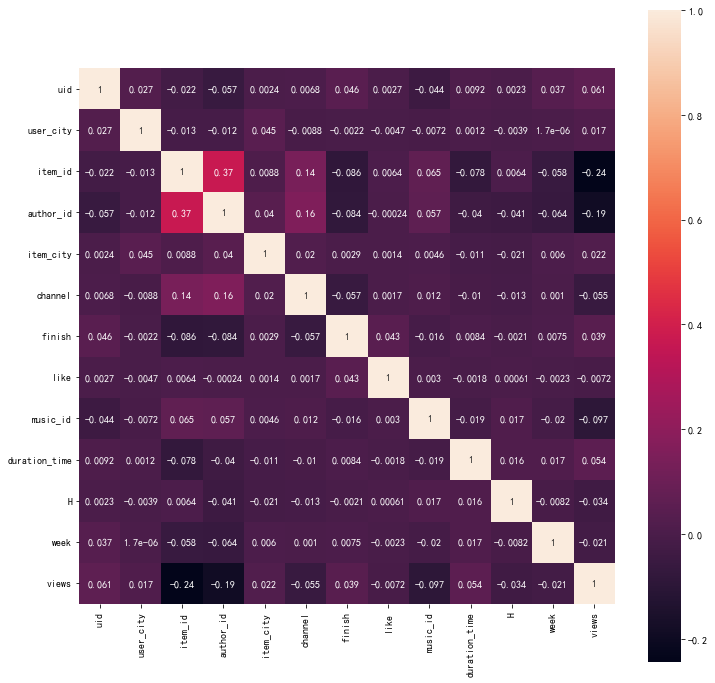

In [84]:
# 数据相关性热力图分析
figure, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), square=True, annot=True, ax=ax)

In [1]:
# 对数据集进行筛选、切片
# 划分数据集(去除完全无关列)
x = df[['uid','user_city', 'author_id', 'item_city', 'channel','music_id', 'duration_time', 'views', 'week']]
y = df['like']

# 将数据集分为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

NameError: name 'df' is not defined

In [86]:
# 预定义模型训练函数
def modelTrainFeature(name, model):
    model = model.fit(x_train, y_train)
    print(f'{name}模型的准确率:  {model.score(x_test, y_test)}')
    # 获取特征重要性
    importances = model.feature_importances_

    # 打印每个特征的重要性
    for feature, importance in zip(x.columns, importances):
        print(f"{feature}: {importance}")

    # 选择重要性较高的特征
    selected_features = x.columns[importances > 0.05]
    print(f"Selected features: {selected_features}")
    return model


def modelTrain(name, model):
    model = RFE(model)
    model = model.fit(x_train, y_train)
    print(f'{name}模型的准确率:  {model.score(x_test, y_test)}')
    # 模型评估
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print('MSE:', mse)
    return model

In [87]:
# 通过随机森林模型，判断特征重要性

# 创建随机森林分类器
rfc = RandomForestClassifier(random_state=42)

# 使用 随机森林 分类器
rfc = modelTrainFeature('随机森林', rfc)

随机森林模型的准确率:  0.9904851535585698
uid: 0.2775688138227059
user_city: 0.16092985446972527
author_id: 0.15393491710650944
item_city: 0.10521833211254718
channel: 0.0023967828019123413
music_id: 0.1319471710714671
duration_time: 0.05485618080006437
views: 0.06623116710029535
week: 0.046916780714773065
Selected features: Index(['uid', 'user_city', 'author_id', 'item_city', 'music_id',
       'duration_time', 'views'],
      dtype='object')


In [88]:
# 通过 xgboost 模型，判断特征重要性

# 创建XGBoost分类器
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# 使用 XGBoost 分类器
xgb_model = modelTrainFeature('XGBoost', xgb_model)

XGBoost模型的准确率:  0.9905369585301202
uid: 0.30702996253967285
user_city: 0.12908971309661865
author_id: 0.054660435765981674
item_city: 0.07860849052667618
channel: 0.10314151644706726
music_id: 0.13229410350322723
duration_time: 0.04540245607495308
views: 0.10030552744865417
week: 0.04946775361895561
Selected features: Index(['uid', 'user_city', 'author_id', 'item_city', 'channel', 'music_id',
       'views'],
      dtype='object')


In [89]:
# 通过 逻辑回归 模型， 判断

# 创建 分类器
# 创建逻辑回归分类器
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# 使用递归特征消除进行特征选择
selector = RFE(lr_model, n_features_to_select=3)
selector.fit(x_train, y_train)

# 准确率
print(f'逻辑回归模型的准确率:  {selector.score(x_test, y_test)}')

# 获取选择的特征
selected_features = x.columns[selector.support_]
print(f"Selected features: {selected_features}")

逻辑回归模型的准确率:  0.9905312024221702
Selected features: Index(['channel', 'duration_time', 'week'], dtype='object')


In [90]:
# 朴素贝叶斯

# 创建朴素贝叶斯分类器
nb_model = GaussianNB()

# 使用卡方检验进行特征选择
nb_selector = SelectPercentile(chi2, percentile=50)
nb_selector.fit(x_train, y_train)

# 准确率
nb_model.fit(x_train, y_train)
print(f'朴素贝叶斯模型的准确率:  {nb_model.score(x_test, y_test)}')

# 获取选择的特征
selected_features = x.columns[nb_selector.get_support()]
print(f"Selected features: {selected_features}")

朴素贝叶斯模型的准确率:  0.9905312024221702
Selected features: Index(['uid', 'author_id', 'music_id', 'views'], dtype='object')


In [91]:
#决策树
clf =DecisionTreeClassifier(class_weight='balanced',random_state=42)
clf.fit(x_train,y_train)
# 准确率
print(f'决策树模型的准确率:  {clf.score(x_test, y_test)}')

决策树模型的准确率:  0.9833677260783349


In [92]:
# # 创建SVM分类器, (构建模型时间过长，放弃)
# svm_model = SVC(kernel='linear', C=1, random_state=42)

# # 使用SelectFromModel进行特征选择
# selector = SelectFromModel(svm_model, threshold='mean')
# selector.fit(x_train, y_train)

# # 获取选择的特征
# selected_features = x.columns[selector.get_support()]
# print(f"Selected features: {selected_features}")

# 模型预测

In [93]:
# 多项式回归
# 创建多项式特征对象
poly = PolynomialFeatures(degree=3)

# 将特征进行多项式转换
X_poly = poly.fit_transform(x)

# 创建线性回归模型对象
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
# 模型评估
scores = cross_val_score(model_poly, x, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-1.84640196e-03 -1.03673072e-05 -6.73275542e-05 -2.28096408e-06
 -1.58612658e-04]
Accuracy: -0.00 (+/- 0.00)


# 模型准确率

In [94]:
score=[rfc.score(x,y),xgb_model.score(x,y),selector.score(x,y),nb_model.score(x,y),clf.score(x,y)]
score

[0.9980682468361498,
 0.9903613805933636,
 0.9903452634632719,
 0.9903452634632719,
 0.9966706614124823]

In [95]:
model=['随机森林','xgboost','逻辑回归','朴素贝叶斯','决策树']
c = (
    Line()
    .add_xaxis(model)
    .add_yaxis("准确率", score, is_connect_nones=True,itemstyle_opts=opts.ItemStyleOpts(color='#1E90FF'))
    .set_global_opts(title_opts=opts.TitleOpts(title="各模型准确率"),
                     yaxis_opts=opts.AxisOpts(
                          min_=0.98,
                                               ),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
                    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
   )
c.render_notebook()

# 模型auc曲线

In [96]:
# auc 函数
def my_auc(model):
    y_test_proba = model.predict_proba(x_test)
    false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_proba[:, 1])
    roc_auc = auc(false_positive_rate, recall)
    return false_positive_rate, recall, roc_auc

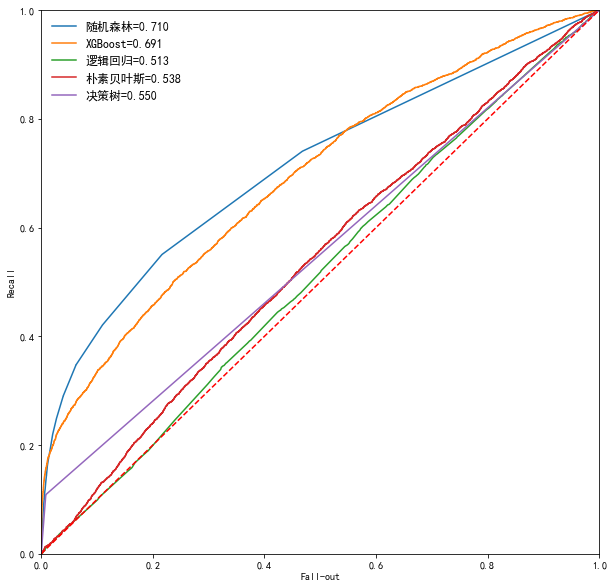

In [97]:
# 画出模型的 ROC 曲线目前以使用模型
# 目前以使用的模型
models = [rfc, xgb_model, selector, nb_model , clf]
models_name = ['随机森林', 'XGBoost', '逻辑回归', '朴素贝叶斯', '决策树']
models_auc = [my_auc(m) for m in models]

# 画图
for i,m in enumerate(models_auc):
    plt.plot(m[0], m[1], label='{}={:.3f}'.format(models_name[i], m[2]))
plt.legend(loc='best', fontsize=12, frameon=False)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

# 根据准确率以及auc值来看最终选择随机森林模型最佳

# 模型优化

In [98]:
#跑不出来放弃
# 调参，绘制学习曲线来调参n_estimators（对随机森林影响最大）
# score_lt = []

# 每隔10步建立一个随机森林，获得不同n_estimators的得分
# for i in range(0,200,10):
#     rfc = RandomForestClassifier(n_estimators=i+1
#                                 ,random_state=90)
#     score = cross_val_score(rfc, x, y, cv=3).mean()
#     score_lt.append(score)
# score_max = max(score_lt)
# print('最大得分：{}'.format(score_max),
#       '子树数量为：{}'.format(score_lt.index(score_max)*10+1))

# # 绘制学习曲线
# x = np.arange(1,201,10)
# plt.subplot(111)
# plt.plot(x, score_lt, 'r-')
# plt.show()

# n_e优化

In [99]:
df_like = df[df['like']==1]
df_dislike = df[df['like']==0]
data = pd.concat([df_like[::20], df_dislike[::40]], axis=0)
print(len(data)/len(df))

0.02524172817078632


In [100]:
# 对数据集进行筛选、切片
# 划分数据集(去除完全无关列)
x1 = data[['uid','user_city', 'author_id', 'item_city', 'channel','music_id', 'duration_time', 'views', 'week']]
y1 = data['like']

# 将数据集分为训练集和测试集
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [101]:
params = {
    'n_estimators': [x for x in range(100,2000,200)]
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    params, scoring="roc_auc",
    cv=3, verbose=1
).fit(x1_train, y1_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


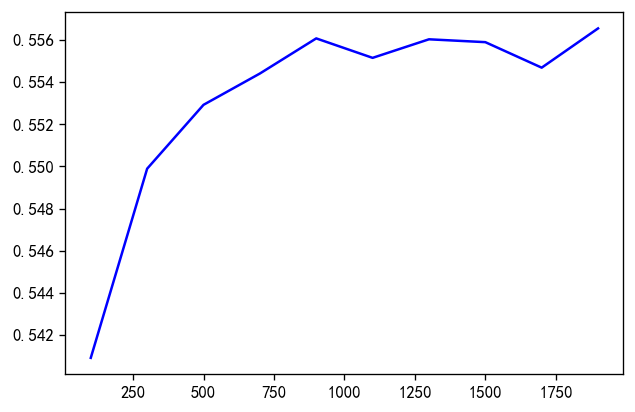

In [102]:
a = grid.cv_results_['mean_test_score']
plt.figure(figsize=(6,4),dpi=120)
plt.plot(params['n_estimators'], a, color='blue')
plt.show()

In [103]:
grid.best_params_

{'n_estimators': 1900}

# max_f优化

In [104]:
params = {
    'max_features': range(2,10,2)
}
grid = GridSearchCV(
    RandomForestClassifier(n_estimators=1900, random_state=42),
    params, scoring="roc_auc",
    cv=3, verbose=1
).fit(x1_train, y1_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


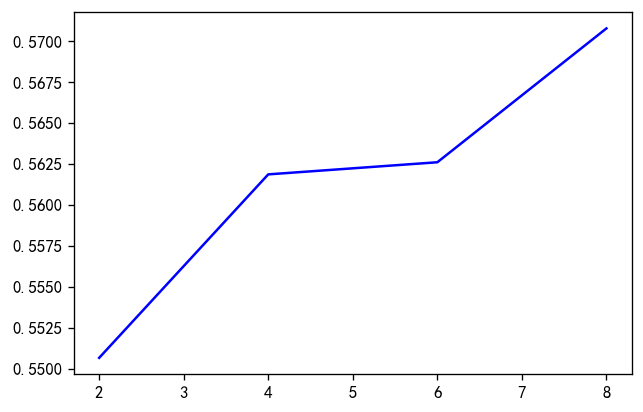

In [105]:
a = grid.cv_results_['mean_test_score']
plt.figure(figsize=(6,4),dpi=120)
plt.plot(params['max_features'], a, color='blue')
plt.show()

In [106]:
grid.best_params_

{'max_features': 8}

In [107]:
rfc0 = RandomForestClassifier(n_estimators=1900,
                             max_features=8,
                             random_state=42)
rfc0 = modelTrainFeature('随机森林', rfc)

随机森林模型的准确率:  0.9904851535585698
uid: 0.2775688138227059
user_city: 0.16092985446972527
author_id: 0.15393491710650944
item_city: 0.10521833211254718
channel: 0.0023967828019123413
music_id: 0.1319471710714671
duration_time: 0.05485618080006437
views: 0.06623116710029535
week: 0.046916780714773065
Selected features: Index(['uid', 'user_city', 'author_id', 'item_city', 'music_id',
       'duration_time', 'views'],
      dtype='object')


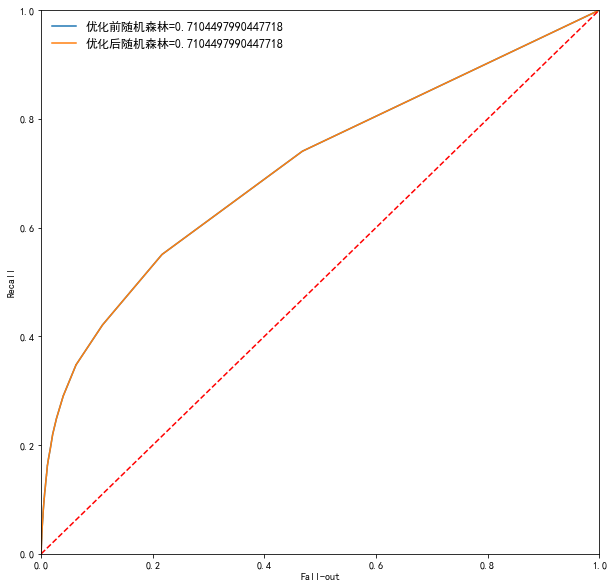

In [108]:
# 画出模型的 ROC 曲线目前以使用模型
# 目前以使用的模型
models = [rfc, rfc0]
models_name = ['优化前随机森林', '优化后随机森林']
models_auc = [my_auc(m) for m in models]

# 画图
for i,m in enumerate(models_auc):
    plt.plot(m[0], m[1], label='{}={}'.format(models_name[i], m[2]))
plt.legend(loc='best', fontsize=12, frameon=False)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [109]:
rfc0.score(x,y)

0.9980682468361498